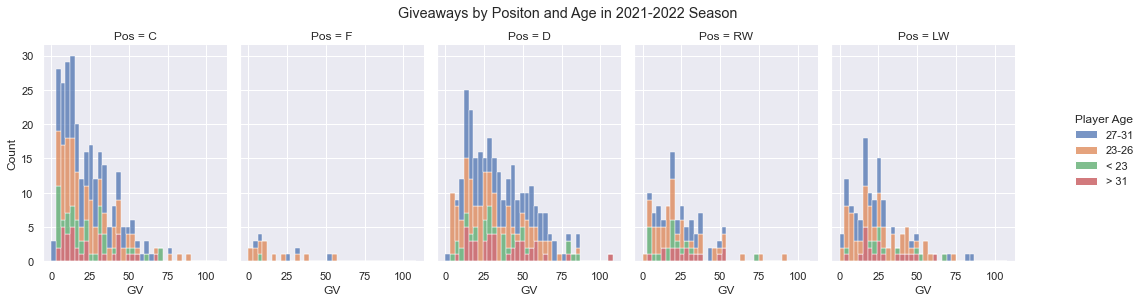

In [1]:

##William Nenad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests

url = 'https://www.hockey-reference.com/leagues/NHL_2022_skaters-advanced.html'
df = pd.read_html(url)
df1 = pd.DataFrame(df[0], columns = None)
z = []
for i in range(len(df1['Unnamed: 2_level_0'])):
    if df1.iloc[i, 2] == 'Age':
        z.append(i)
df2 = df1.drop(df1.index[z])
a = []
for i in df2.columns:
    a.append(i[1:])
b = []
for z in a:
    b.append(''.join(z))
df2.columns = b
data = df2
data['GP'] = data['GP'].astype('int')

data = data[data.GP >15]
data = data[data.Pos !='RW/C']
data = data[data.Pos !='W']
data = data[data.Pos !='D/RW']
data = data[data.Pos !='LW/C']
data = data[data.Pos !='C/RW']
data = data[data.Pos !='C/LW']
data = data[data.Pos !='C/W']

data['Age'] = data['Age'].astype('int')
data['GV'] = data['GV'].astype('float')

x =[]
for i in data['Age']:
    if i < 23:
        x.append('< 23')
    if i >= 27 and i < 32:
        x.append('27-31')
    if i >= 23 and i < 27:
        x.append('23-26')
    if i > 31:
        x.append('> 31')
data['Player Age']= x

sns.set_theme(style="darkgrid")
rp = sns.displot(data, x="GV", col="Pos", hue = "Player Age", multiple = 'stack',
    binwidth=3, height=3, facet_kws=dict(margin_titles= True),)

rp.fig.subplots_adjust(top = .8, bottom = -.2)
rp.fig.suptitle('Giveaways by Positon and Age in 2021-2022 Season')

plt.show()

In [ ]:

##William Nenad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests


url = 'https://www.hockey-reference.com/leagues/NHL_2022_skaters-advanced.html'

df = pd.read_html(url)

df1 = pd.DataFrame(df[0], columns = None)

z = []
for i in range(len(df1['Unnamed: 2_level_0'])):
    if df1.iloc[i, 2] == 'Age':
        z.append(i)

df2 = df1.drop(df1.index[z])


a = []
for i in df2.columns:
    a.append(i[1:])

b = []
for z in a:
    b.append(''.join(z))

df2.columns = b

data = df2

data['GP'] = data['GP'].astype('int')
data['Age'] = data['Age'].astype('float')
data['Rk'] = data['Rk'].astype('float')
data['CF%'] = data['CF%'].astype('float')
data['FF%'] = data['FF%'].astype('float')
data['CF'] = data['CF'].astype('float')
data['CF% rel'] = data['CF% rel'].astype('float')
data['CA'] = data['CA'].astype('float')
data['FF'] = data['FF'].astype('float')
data['FA'] = data['FA'].astype('float')
data['FF% rel'] = data['FF% rel'].astype('float')
data['oiSH%'] = data['oiSH%'].astype('float')
data['oiSV%'] = data['oiSV%'].astype('float')
data['CF%'] = data['CF%'].astype('float')
data['PDO'] = data['PDO'].astype('float')
data['oZS%'] = data['oZS%'].astype('float')
data['dZS%'] = data['dZS%'].astype('float')
data['TK'] = data['TK'].astype('float')
data['GV'] = data['GV'].astype('float')
data['SAtt.'] = data['SAtt.'].astype('float')
data['E+/-'] = data['E+/-'].astype('float')
data['Thru%'] = data['Thru%'].astype('float')


df = data[data.GP >15]


plt.figure(figsize=(25,25), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of Advanced Hockey Metrics', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests


url = 'https://www.hockey-reference.com/leagues/NHL_2022_skaters-advanced.html'

df = pd.read_html(url)

df1 = pd.DataFrame(df[0], columns = None)

z = []
for i in range(len(df1['Unnamed: 2_level_0'])):
    if df1.iloc[i, 2] == 'Age':
        z.append(i)

df2 = df1.drop(df1.index[z])


a = []
for i in df2.columns:
    a.append(i[1:])

b = []
for z in a:
    b.append(''.join(z))

df2.columns = b

data = df2

data['GP'] = data['GP'].astype('int')
data['CF%'] = data['CF%'].astype('float')
data['FF%'] = data['FF%'].astype('float')
data = data[data.GP > 10]

slope, intercept, r_value, p_value, std_err = stats.linregress(data['CF%'],data['FF%'])
slopes = np.around(slope,4)
intercepts = np.around(intercept,4)

g = sns.lmplot(x = 'CF%', y = 'FF%', data = data, fit_reg = False, hue = 'Pos').set(title= 'Comparison of Goal Scoring Metrics of Hockey Players in 2021-2022 Season')
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y='+ str(intercepts)+' + ('+str(slopes)+')x'
a = g.ax.text(0.0, 0.0, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
g.ax.axline(xy1 = (0,intercepts), slope=slopes, color="b", dashes = (4,1))

plt.show()